Individual Planning Report
-

Student Name: Samantha Lo 

Course: Data Science 100

Date: 2025-11-12

Link: https://github.com/slo0608/Individual_planning.git

(1.) Data Description
- 
The project uses two datasets, which are players.csv and sessions.csv. They are collected from a Minecraft research server operated by UBC’s Computer Science department. These datasets record information about player demographics, play style, and in-game activity over time.

`players.csv`
Summary statistics:
- Number of observations: 196
- Number of variables: 7
- Unit of observation: Individual player

Variables:
- `name`: a categorical variable that records each player’s username in the game. 
- `hashedEmail`: a categorical variable containing an anonymized version of each player’s email address. This ensures player privacy.
- `age`: a numerical variable representing the player’s age.
- `gender`: a categorical variable that records the player’s gender (for example: male, female, other, or prefer not to say).
- `played_hours`: a numerical variable measuring the total hours the player has spent on the Minecraft server.
- `experience`: a categorical variable representing the player’s experience or engagement level, classified into groups such as pro, amateur, or veteran.
- `subscribe`: a categorical variable indicating whether the player subscribed to the newsletter.

Issues in the Data:
- Information like age or gender is self-reported, so it might not always be accurate.
- The played_hours numbers might be off because some players could have left the game open without actually playing which distort the mean.
- An imbalance in the subscribe variable if most players did not subscribe to the newsletter.
- Some players played very briefly, and the system rounded the hours played to 0.

Potential or Indirect Issues:
- Some players might share the same account, which could mess up the link between player behaviour and demographics.
- If the server once had technical issues or downtime, some play hours might not have been logged correctly.
- Some players might have multiple accounts, which could make it seem like there are more unique players than there actually are.

Data Collection Method:
The data was collected by linking gameplay logs and survey responses. The server will automatically save data such as hours played. These two sources were both used hashed email to protect privacy.

(2.) Question
-
Broad Question:
- What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question:
- Can a player’s age, gender, hours played, and experience level  predict whether they will subscribe to the newsletter?

The `players.csv` dataset provides information for this question. The `subscribe` variable shows whether a player subscribes to newsletters, which is exactly what we want to predict.
To prepare the data for analysis, I will check for outlier values, ensure all columns are formatted correctly, and make sure categories like gender and experience are understandable. If necessary, I might also use `sessions.csv` to calculate each player's total playtime, so we can see if players who play more might be more likely to subscribe or not.

(3.) Exploratory Data Analysis and Visualization
-

In [2]:
library(tidyverse)
library(dplyr)
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


Minimal Wrangling
-

In [3]:
players <- players |>
  mutate(
    experience = as.factor(experience),
    gender = as.factor(gender),
    subscribe = as.factor(subscribe),
  played_hours = as.numeric(played_hours),
  Age = as.numeric(Age))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Compute mean for quantitative variables (Age and Played_hours)
-

In [4]:
summarize(players, mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE))

mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


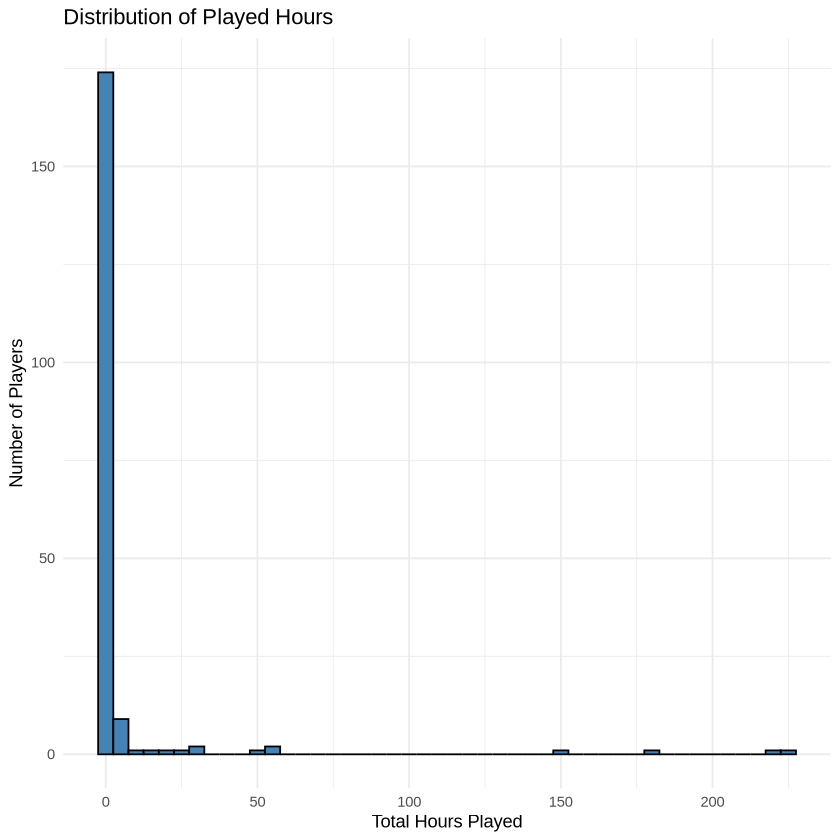

In [5]:
histogram_played_hours <- ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  labs(title = "Distribution of Played Hours",
       x = "Total Hours Played",
       y = "Number of Players") +
  theme_minimal()
histogram_played_hours

Most players have relatively low total played hours.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


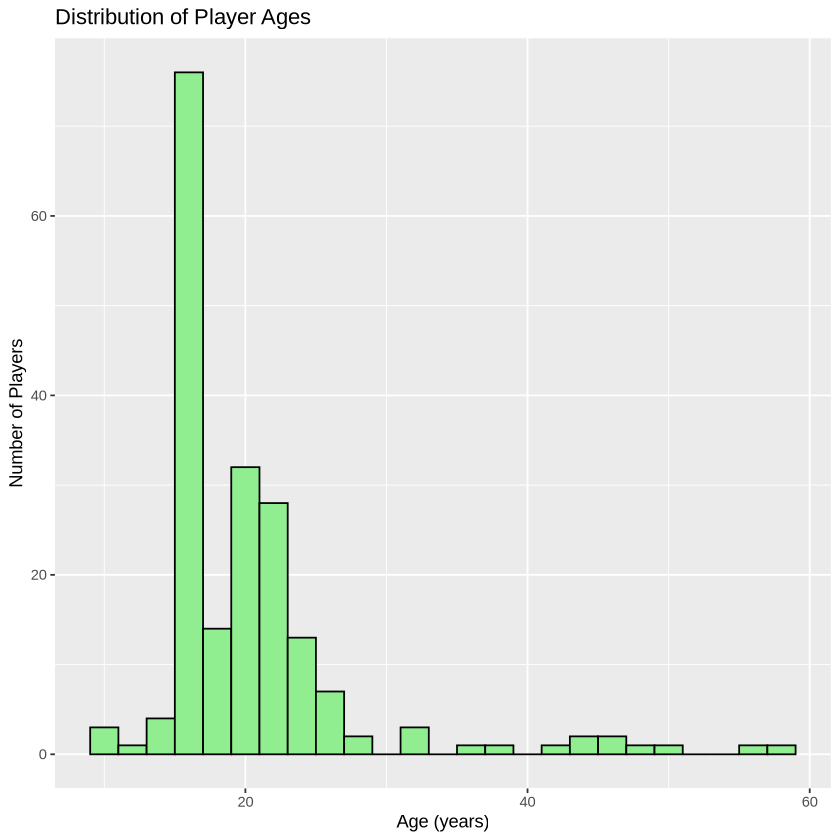

In [6]:
histogram_age <- ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Player Ages",
       x = "Age (years)",
       y = "Number of Players")
histogram_age

There seems to be a concentration around the early to mid 20s, the server seems to attract more younger demographics.

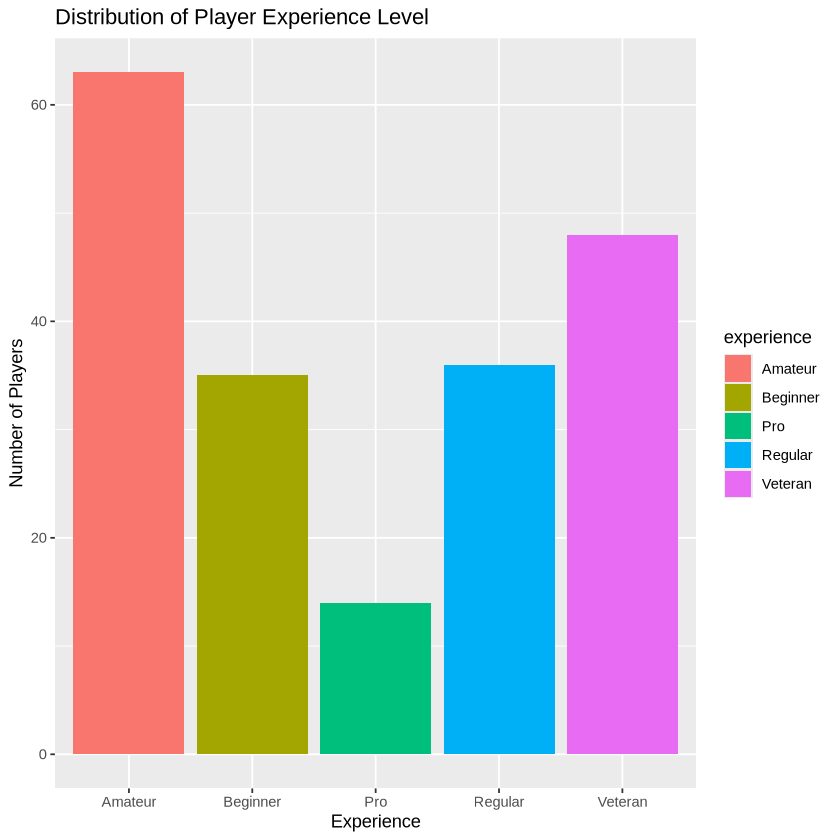

In [7]:
bar_experience <- ggplot(players, aes(x = experience, fill = experience)) +
  geom_bar() +
  labs(title = "Distribution of Player Experience Level",
       x = "Experience",
       y = "Number of Players")
bar_experience

The bar plot shows that the number of amateur players are more than that of other level players.

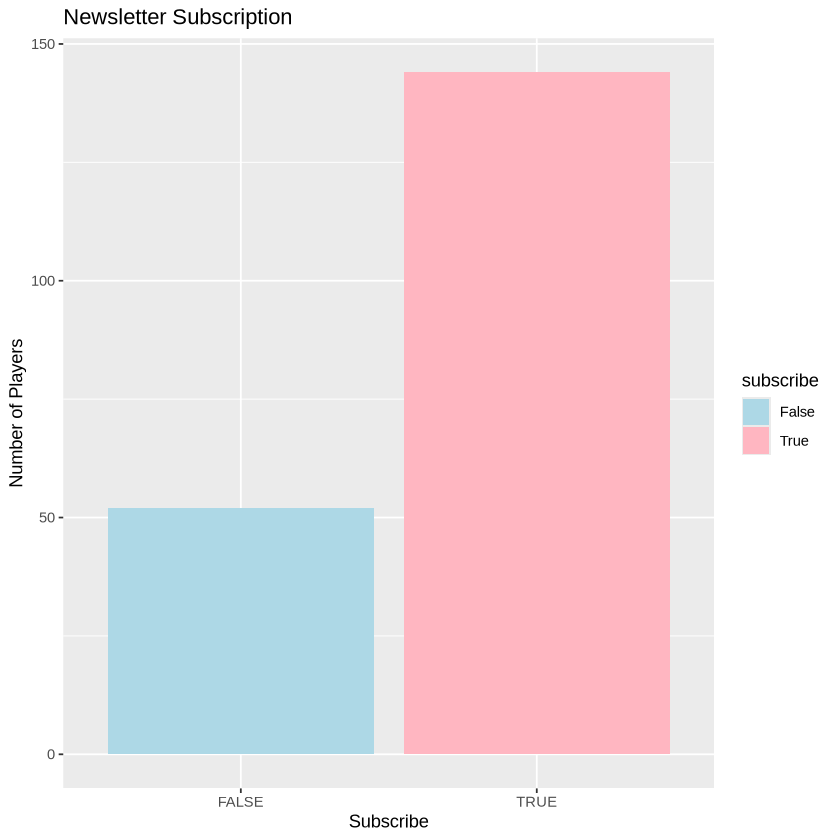

In [8]:
bar_subscribe <- ggplot(players, aes(x = subscribe, fill = subscribe)) +
  geom_bar() +
  labs(title = "Newsletter Subscription",
       x = "Subscribe",
       y = "Number of Players") +
  scale_fill_manual(values = c("lightblue", "lightpink"), labels = c("False", "True"))
bar_subscribe

More people subscribed the newsletter already.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


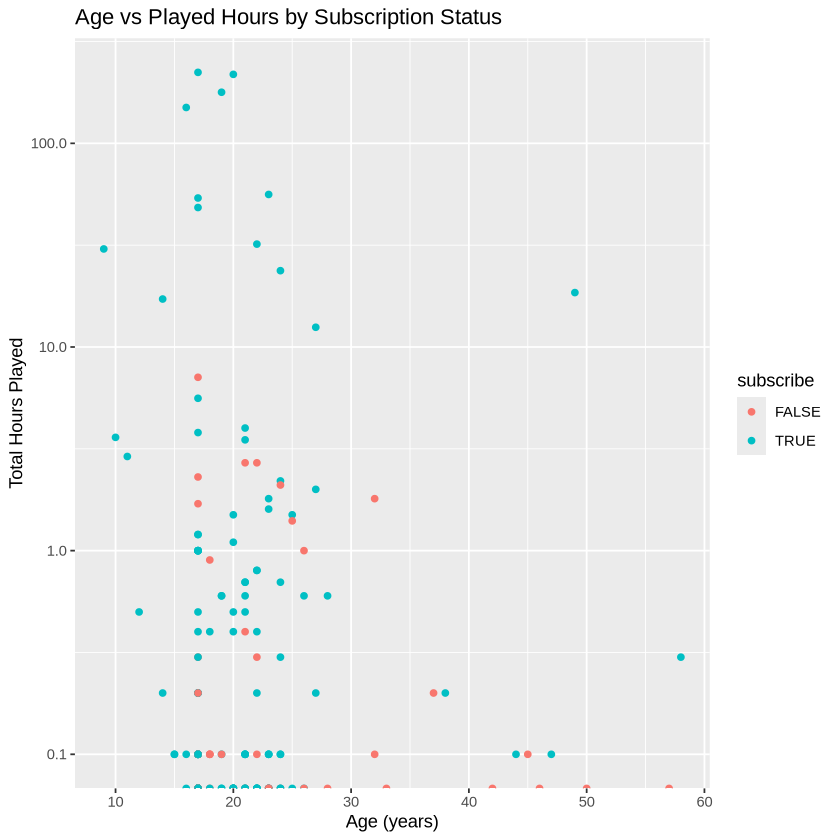

In [9]:
scattered_age_played_hours <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Age vs Played Hours by Subscription Status",
       x = "Age (years)",
       y = "Total Hours Played")+
       scale_y_log10()
scattered_age_played_hours

Most points cluster at low played hours, subscribers tend to have higher played hours.

(4.) Methods and Plan
-

I will use KNN classification to predict if a player subscribes or not. This method is appropriate because it works with a binary outcome and can include multiple factors like played_hours, age, and experience. It shows how each factor affects the chance of subscribing.

Assumptions:
- Each player is independent.

Limitations:
- Very high or low values can affect results.
- If most players don’t subscribe, predictions for subscribers may be less accurate.
- Similar players have similar outcomes (subscribed or not).
- k-NN performance depends heavily on the choice of k.
- If k is too small, the model can overfit; if too large, it can underfit.

Plan:
- Split the data: 70% training, 30% testing.
- Use cross-validation if necessary.
- Numeric variables like age and played_hours will be standardized so that differences in scale do not affect the distance calculations.
- Accuracy will be measured on the testing data to see how well the model predicts new players.